# Matemática para Ciencia de los Datos
# Trabajo Práctico 3

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: 

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante(s):
1. **Nombre_Estudiante_1**
1. **Nombre_Estudiante_2**


In [3]:
%matplotlib inline
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt

---

**Pregunta 1**



Se puede demostrar que para los vectores generadores de un subespacio $E=\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right\}$ , con $V=\left[\vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right]$,con $\vec{v}_{m}\in\mathbb{R}^{n}$ si son ortonormales, la ecuación de la proyección de un vector $\vec{u}\in\mathbb{R}^{n}$ originalmente dada por:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$$

se puede reescribir como: 

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,V^{T}\vec{u}$$

con $V\in\mathbb{R}^{n\times m}$.









**1.1 (25 puntos)**

Utilizando numpy, proponga una matriz ortonormal de dimensiones 3x3, para ello utilice una fuente como "Proceso de ortonormalización de  Gram - Schmidt" (https://blog.nekomath.com/algebra-lineal-i-proceso-de-gram-schmidt/) para producir una matriz ortonormal a partir de una matriz que no es ni ortonormal ni ortogonal. 

Finalmente muestre en numpy que su matriz resultante es ortonormal ($V$).



In [5]:

v_1 = np.array([1,2,3])
v_2 = np.array([4,3,5])
v_3 = np.array([1,2,9])

u1 = v_1
u2 = v_2 - ((np.dot(v_2,u1))/(np.dot(u1,u1)))*u1
u3 = v_3 - ((np.dot(v_3,u1))/(np.dot(u1,u1)))*u1 - ((np.dot(v_3,u2))/(np.dot(u2,u2)))*u2


ui = u1/LA.norm(u1)
uj = u2/LA.norm(u2)
uk = u3/LA.norm(u3)

V = np.array([ui.T,uj.T,uk.T])

#muestras de que la matriz es ortonormal:
A = V@V.T
B = np.round(A)
norm_i = LA.norm(ui)
norm_j = LA.norm(uj)
norm_k = LA.norm(uk)
print("Comprobación:")
print('El producto de la matriz V y su transpuesta es: \n',B)
print('La normal del vector i es: ',norm_i)
print('La normal del vector j es: ',norm_j)
print('La normal del vector k es: ',norm_k)


Comprobación:
El producto de la matriz V y su transpuesta es: 
 [[ 1. -0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]
La normal del vector i es:  1.0
La normal del vector j es:  1.0
La normal del vector k es:  1.0


**1.2 (15 puntos)**

Proponga un vector $\vec{u}$ y programe en numpy las operaciones algebraicas siguientes (tome $V$ del paso anterior).

$V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$

y,

$V\,V^{T}\vec{u}$


In [9]:
m3 = np.eye(3) 

v3 = np.array([[1. , 2., 3.]])


# Lambda es un operador que nos permite crear funciones usualmente matematicas 
# de una manera distinta a la típica declaración usando def



# Funciones de proyeccion
# Estructura
# nombre = lambda parametro1,p2,p3,... : Aqui se escribe la funcion que queremos hacer
#                            V * (                          V^T  * V     )^-1 * V^T     *  u      Aqui transponemos pero es para que calcen dimensiones
proy_larga = lambda V, u:  V @ LA.inv(  V.T @ V  )  @  V.T  @ u.T

#                          V * V^T   *   u
proy_peq = lambda V, u: V @ V.T @ u.T

# Llamamos la funcion igual que siempre
proy_l3 = proy_larga(m3, v3)
proy_p3 = proy_peq(m3, v3)

print( proy_l3)
print( proy_p3)



[[1.]
 [2.]
 [3.]]
[[1.]
 [2.]
 [3.]]


**1.3 (10 puntos)**

Programe en python para calcular el error de proyección obtenido para los casos del punto **1.2**.

In [11]:

# Funcion para calcular el error
error = lambda target, proy: np.sqrt(((target - proy)**2).sum())

print('Error de proyeccion larga en m3 ' + str(error(v3, proy_l3.T)))
print('Error de proyeccion pequeña en m3 ' + str(error(v3, proy_p3.T)))

Error de proyeccion larga en m3 0.0
Error de proyeccion pequeña en m3 0.0


---

**Pregunta 2 (10 puntos)**


Programe en python la función calculeDet2, que recibe como parámetro una matriz cuadrada de dimensiones 2x2, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función tipo det para calcularla. Pruébela con dos matrices que Usted proponga.

def calculeDet2( M ):





In [12]:
det_2x2 = lambda m: m[0,0]*m[1,1] - m[1,0]*m[0,1]

m1 = np.array([[1., 2.],
                   [3., 4.]])
m2 = np.array([[10., 20.],
                   [0.5, 4.]])

print('Det(m1) = ' + str(det_2x2(m1)))
print('Det(m2) = ' + str(det_2x2(m2)))

Det(m1) = -2.0
Det(m2) = 30.0


---

**Pregunta 3 (10 puntos)**


Programe en python la función calculeDet3, que recibe como parámetro una matriz cuadrada de dimensiones 3x3, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función de numpy tipo det para calcularla (sí puede usar función que programó en la **Pregunta 2**). Pruébela con dos matrices que Usted proponga.

def calculeDet3( M ):






In [13]:

# Utilizando expansiones de laplace calculamos el determinante
# de cualquier matriz cuadrada
def calc_det(m):
    
    # Calculamos el tamano de la matriz
    l = len(m)
    # Creamos la variable de retorno 
    det = 0

    # Si es 2 retornamos el valor del determiante
    if(l == 2):
        det = det_2x2(m)
    # de lo contrario hacemos la expansión
    else:
       
        for i in range(l):
             # En este acaso trabajamos sobre la primer fila 
            # asi que segun la formula no la tomamos en cuenta
            m_mod = np.delete(m, 0, 0)
            # Eliminamos la columna que nos dice la formula
            m_mod = np.delete(m_mod, i, 1)

            # Y se las sumamos al determinante
            det += m[0,i]*calc_det(m_mod)*((-1)**(i))

    return det



# Utilizamos np.arrays porque con tensores eliminar filas y columnas 
# crea expresiones bastante complicadas y poco legibles
t1 = np.array([[1,2,3,4],
               [5,6,7,8],
               [9,10,11,12],
               [13,14,15,16]])
t2 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])


print('Det(t1) = ' + str(calc_det(t1)))
print('Det(t2) = ' + str(calc_det(t2)))

Det(t1) = 0
Det(t2) = 0


---

**Pregunta 4 (15 puntos)**

Se tiene que:

$$\textrm{det}\left(A\,B\right)=\textrm{det}\left(A\right)\,\textrm{det}\left(B\right)$$

Proponga dos matrices de 4x4 ( $A$ e $B$) y programando en numpy muestre esta igualdad (puede usar de numpy las funciones det y la de multiplicar matrices).






In [16]:
A = np.array([  [1., 2., 3., 8.],
                    [4., 5., 6., 3.],
                    [7., 8., 9., 11.],
                    [17., 15., 12., 13.]])
B = np.array([  [5., 24., 11., 7.],
                    [9., 21., 2., 9.],
                    [14., 3., 9., 8.],
                    [7., 10., 13., 12.]])


det_A = LA.det(A)
det_B = LA.det(B)
AB = np.matmul(A,B)

print('det(AB) = ' + str(LA.det(AB)))
print('det(A)det(B) = ' + str(det_A * det_B))

det(AB) = 859326.0000000097
det(A)det(B) = 859325.9999999944


---

**Pregunta 5 (15 puntos)**


Utilizando el archivo "Datos_todo-PROCESADO.csv", haga:
- Cargue el archivo.
- Muestre cuántas filas por cuántas columnas tiene el conjunto de datos.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con todas las columnas menos la última de la derecha.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), utilizando el concepto de mínimos cuadrados $\left(A^{T}A\right)^{-1}A^{T}\vec{b}$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



Filas:  998
Columnas:  9
***********************************
[[1.         0.18656716 0.1559633  0.19565217 0.01168762 0.33333333
  0.         1.        ]
 [1.         0.81343284 0.76146789 0.82608696 0.43332743 0.33333333
  1.         0.        ]]
[0.01  0.435]
[ 0.01298003 -0.07107447  0.00203732  0.08440335  0.89314748 -0.07685081
  0.00639926  0.00658077]
Entre b y b_calculado:  1.222606736150762
R2:  0.926970889344302


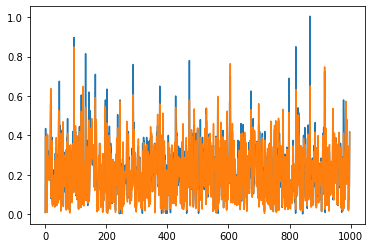

In [18]:
# carga archivos
import pandas as pd
archivo = "Dataset_usar.csv"
dataFrameReales = pd.read_csv(archivo, header = 0, sep=";")

nFilas, nColumnas = dataFrameReales.shape
print("Filas: ", nFilas)
print("Columnas: ", nColumnas)
separador = "*"*35
print(separador)

# Convertir de pandas a numpy, y luego a torch
test = pd.DataFrame(dataFrameReales).to_numpy()
total_columnas = len(test[0])

A = test[:, 0:total_columnas - 1] # todas menos la última

# b  , 1 columna
b = test[:, total_columnas - 1]  # la última


print(A[0:2])
print(b[0:2])

from numpy import linalg as LA
# pinv es la pseudo-inversa

At = A.transpose()
invMatrix = LA.pinv(np.matmul(At, A))
pesos = np.matmul( np.matmul(invMatrix, At),  b)

print(pesos)
b_calculado = np.matmul(A, pesos)

dif_b_y_bcalculado = LA.norm(b - b_calculado)
print("Entre b y b_calculado: ", dif_b_y_bcalculado)


from sklearn.metrics import r2_score
print("R2: ", r2_score(b, b_calculado) )

# Graficar predicciones

import matplotlib.pyplot as plt

cantidad_muestras = len(b)
eje_X = np.array(range(cantidad_muestras))

plt. plot(eje_X, b, label = "b")
plt. plot(eje_X, b_calculado, label = "b_calculado")

plt.show()